In [480]:
import pandas as pd
df=pd.read_csv('new_Cardekho_dataset.csv')
df

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,0.00,2012.0,Individual,120000.0,First Owner,Petrol,Manual,19.0,796.0,46.30,5
1,Hyundai Grand i10 Asta,5.50,7.11,2016.0,Individual,20000.0,First Owner,Petrol,Manual,18.0,1197.0,82.00,5
2,Hyundai i20 Asta,2.15,0.00,2010.0,Individual,60000.0,First Owner,Petrol,Manual,17.0,1197.0,80.00,5
3,Maruti Alto K10 2010-2014 VXI,2.26,0.00,2012.0,Individual,37000.0,First Owner,Petrol,Manual,20.0,998.0,67.10,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,10.14,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,22.0,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19626,Toyota Platinum Etios 1.4 GXD,6.50,0.00,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,23.0,1364.0,67.05,5
19627,Maruti Ertiga BSIV VXI,9.25,0.00,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,17.0,1373.0,91.10,7
19628,Skoda Rapid 1.5 TDI Elegance,4.25,0.00,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,21.0,1498.0,103.52,5
19629,Mahindra XUV500 W6 2WD,12.25,17.83,2016.0,Dealer,3800000.0,First Owner,Diesel,Manual,16.0,2179.0,140.00,7


df.dtypes

from sklearn import preprocessing
encode_columns=['seller_type','fuel_type','transmission_type','owner_type']
for col_name in encode_columns:
    le=preprocessing.LabelEncoder()
    df[col_name]=le.fit_transform(df[col_name])
    #print(x)
    

df.dtypes

from sklearn.model_selection import train_test_split
x=df.drop(['full_name','selling_price','new-price','seller_type'],axis='columns',inplace=False)
y=df['selling_price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LinearRegression

linear_classifier = LinearRegression()
linear_classifier.fit(x_train,y_train)

linear_classifier.coef_

linear_classifier.intercept_

predictions = linear_classifier.predict(x_test)


score = r2_score(y_test,predictions)
print(score)

from statsmodels.api import OLS

model= OLS(y_train,x_train).fit()
print(model.summary())

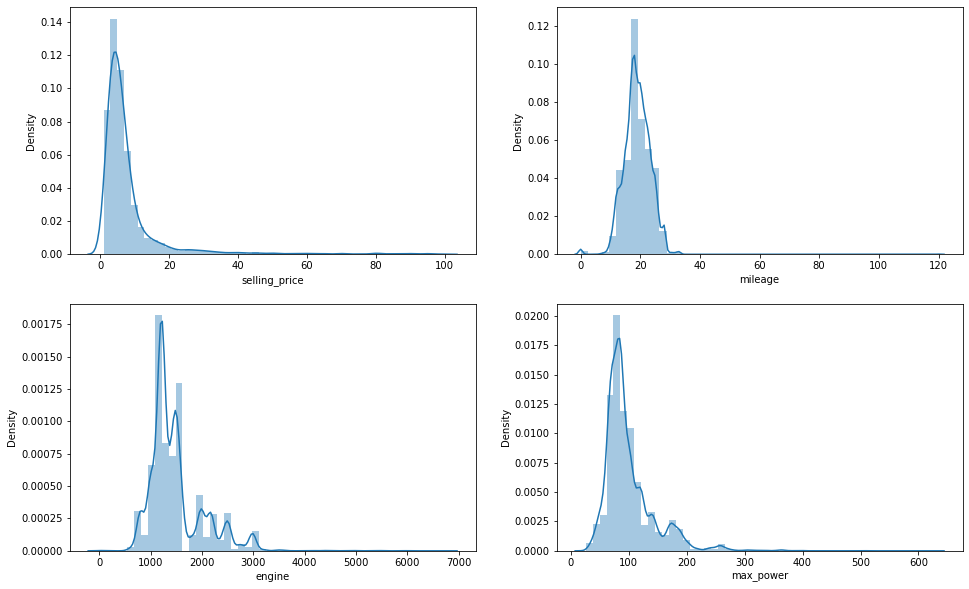

In [481]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['selling_price'])
plt.subplot(2,2,2)
sns.distplot(df['mileage'])
plt.subplot(2,2,3)
sns.distplot(df['engine'])
plt.subplot(2,2,4)
sns.distplot(df['max_power'])
plt.show()

In [482]:
df.size

255203

In [483]:
print("Highest allowed",df['selling_price'].mean() + 3*df['selling_price'].std())
print("Lowest allowed",df['selling_price'].mean() - 3*df['selling_price'].std())

Highest allowed 40.868392909059224
Lowest allowed -24.461615872739102


In [484]:
rem_sp = df[(df['selling_price'] < 40.86) & (df['selling_price'] > -24.46)]
rem_sp

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,0.00,2012.0,Individual,120000.0,First Owner,Petrol,Manual,19.0,796.0,46.30,5
1,Hyundai Grand i10 Asta,5.50,7.11,2016.0,Individual,20000.0,First Owner,Petrol,Manual,18.0,1197.0,82.00,5
2,Hyundai i20 Asta,2.15,0.00,2010.0,Individual,60000.0,First Owner,Petrol,Manual,17.0,1197.0,80.00,5
3,Maruti Alto K10 2010-2014 VXI,2.26,0.00,2012.0,Individual,37000.0,First Owner,Petrol,Manual,20.0,998.0,67.10,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,10.14,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,22.0,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19626,Toyota Platinum Etios 1.4 GXD,6.50,0.00,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,23.0,1364.0,67.05,5
19627,Maruti Ertiga BSIV VXI,9.25,0.00,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,17.0,1373.0,91.10,7
19628,Skoda Rapid 1.5 TDI Elegance,4.25,0.00,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,21.0,1498.0,103.52,5
19629,Mahindra XUV500 W6 2WD,12.25,17.83,2016.0,Dealer,3800000.0,First Owner,Diesel,Manual,16.0,2179.0,140.00,7


In [485]:
print("Highest allowed",rem_sp['mileage'].mean() + 3*rem_sp['mileage'].std())
print("Lowest allowed",rem_sp['mileage'].mean() - 3*rem_sp['mileage'].std())

Highest allowed 32.34529894424291
Lowest allowed 5.822072058000526


In [486]:
mileage_outliers=rem_sp[(rem_sp['mileage'] > 32.34) | (rem_sp['mileage'] < 5.82)]
mileage_outliers

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
224,Maruti Wagon R CNG LXI BSIV,4.35,6.15,2018.0,Dealer,52000.0,First Owner,CNG,Manual,33.0,998.0,67.04,5
239,Maruti Wagon R CNG LXI BSIV,2.70,5.97,2013.0,Dealer,64000.0,First Owner,CNG,Manual,33.0,998.0,67.04,5
415,Toyota Fortuner 4X2 AT,12.35,35.94,2012.0,Dealer,85000.0,First Owner,Petrol,Automatic,0.0,2694.0,163.05,7
498,Hyundai Santro Xing GL,2.35,0.00,2013.0,Dealer,55000.0,First Owner,Petrol,Manual,0.0,1086.0,62.00,5
620,Maruti Alto 800 CNG LXI,2.60,4.89,2016.0,Dealer,42000.0,First Owner,CNG,Manual,33.0,796.0,40.30,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19388,Maruti Wagon R CNG LXI BSIV,3.90,0.00,2016.0,Dealer,74844.0,First Owner,CNG,Manual,33.0,998.0,67.04,5
19426,Hyundai Kona Premium,21.75,25.08,2019.0,Dealer,6000.0,First Owner,Electric,Automatic,0.0,0.0,134.10,5
19532,Toyota Fortuner 4X2 AT,14.50,35.94,2014.0,Dealer,127000.0,First Owner,Petrol,Automatic,0.0,2694.0,163.05,7
19619,Hyundai Santro Xing GL,1.15,0.00,2008.0,Individual,80000.0,First Owner,Petrol,Manual,0.0,1086.0,62.00,5


In [487]:
rem_mil_sp=rem_sp[(rem_sp['mileage'] < 32.34) & (rem_sp['mileage'] > 5.82)]
rem_mil_sp

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,0.00,2012.0,Individual,120000.0,First Owner,Petrol,Manual,19.0,796.0,46.30,5
1,Hyundai Grand i10 Asta,5.50,7.11,2016.0,Individual,20000.0,First Owner,Petrol,Manual,18.0,1197.0,82.00,5
2,Hyundai i20 Asta,2.15,0.00,2010.0,Individual,60000.0,First Owner,Petrol,Manual,17.0,1197.0,80.00,5
3,Maruti Alto K10 2010-2014 VXI,2.26,0.00,2012.0,Individual,37000.0,First Owner,Petrol,Manual,20.0,998.0,67.10,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,10.14,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,22.0,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19626,Toyota Platinum Etios 1.4 GXD,6.50,0.00,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,23.0,1364.0,67.05,5
19627,Maruti Ertiga BSIV VXI,9.25,0.00,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,17.0,1373.0,91.10,7
19628,Skoda Rapid 1.5 TDI Elegance,4.25,0.00,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,21.0,1498.0,103.52,5
19629,Mahindra XUV500 W6 2WD,12.25,17.83,2016.0,Dealer,3800000.0,First Owner,Diesel,Manual,16.0,2179.0,140.00,7


In [488]:
rem_mil_sp

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,0.00,2012.0,Individual,120000.0,First Owner,Petrol,Manual,19.0,796.0,46.30,5
1,Hyundai Grand i10 Asta,5.50,7.11,2016.0,Individual,20000.0,First Owner,Petrol,Manual,18.0,1197.0,82.00,5
2,Hyundai i20 Asta,2.15,0.00,2010.0,Individual,60000.0,First Owner,Petrol,Manual,17.0,1197.0,80.00,5
3,Maruti Alto K10 2010-2014 VXI,2.26,0.00,2012.0,Individual,37000.0,First Owner,Petrol,Manual,20.0,998.0,67.10,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,10.14,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,22.0,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19626,Toyota Platinum Etios 1.4 GXD,6.50,0.00,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,23.0,1364.0,67.05,5
19627,Maruti Ertiga BSIV VXI,9.25,0.00,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,17.0,1373.0,91.10,7
19628,Skoda Rapid 1.5 TDI Elegance,4.25,0.00,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,21.0,1498.0,103.52,5
19629,Mahindra XUV500 W6 2WD,12.25,17.83,2016.0,Dealer,3800000.0,First Owner,Diesel,Manual,16.0,2179.0,140.00,7


In [489]:
print("Highest allowed",rem_mil_sp['engine'].mean() + 3*rem_mil_sp['engine'].std())
print("Lowest allowed",rem_mil_sp['engine'].mean() - 3*rem_mil_sp['engine'].std())

Highest allowed 2956.119458257186
Lowest allowed -18.385390015716666


In [490]:
engine_outliers=rem_mil_sp[(rem_mil_sp['engine'] > 2956.11) | (rem_mil_sp['engine'] < -18.38)]
engine_outliers

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
35,Toyota Fortuner 4x2 Manual,11.50,37.47,2013.0,Individual,110000.0,First Owner,Diesel,Manual,13.0,2982.0,168.50,7
139,BMW 5 Series 530d M Sport,26.00,0.00,2016.0,Dealer,63000.0,First Owner,Diesel,Automatic,18.0,2993.0,261.49,5
164,Ford Endeavour 3.2 Titanium AT 4X4,29.00,36.27,2018.0,Individual,11387.0,First Owner,Diesel,Automatic,10.0,3198.0,197.00,7
242,Toyota Fortuner 4x4 MT,17.55,38.86,2015.0,Individual,80000.0,First Owner,Diesel,Manual,12.0,2982.0,168.50,7
372,Audi Q7 2006-2020 3.0 TDI Quattro Premium Plus,20.00,80.60,2012.0,Dealer,98000.0,First Owner,Diesel,Automatic,12.0,2967.0,241.40,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19179,BMW X6 xDrive30d,32.50,0.00,2013.0,Dealer,72000.0,First Owner,Diesel,Automatic,11.0,2993.0,241.00,4
19231,Ford Endeavour 3.2 Titanium AT 4X4,27.50,35.07,2017.0,Individual,50000.0,First Owner,Diesel,Automatic,10.0,3198.0,197.00,7
19345,Toyota Fortuner 4x2 AT,13.25,39.09,2012.0,Dealer,148400.0,First Owner,Diesel,Automatic,12.0,2982.0,168.50,7
19350,Ford Endeavour 3.2 Titanium AT 4X4,30.50,38.29,2017.0,Dealer,49000.0,First Owner,Diesel,Automatic,10.0,3198.0,197.00,7


In [491]:
rem_mil_sp_eng=rem_mil_sp[(rem_mil_sp['engine'] < 2956.11) & (rem_mil_sp['engine'] > -18.38)]
rem_mil_sp_eng

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,0.00,2012.0,Individual,120000.0,First Owner,Petrol,Manual,19.0,796.0,46.30,5
1,Hyundai Grand i10 Asta,5.50,7.11,2016.0,Individual,20000.0,First Owner,Petrol,Manual,18.0,1197.0,82.00,5
2,Hyundai i20 Asta,2.15,0.00,2010.0,Individual,60000.0,First Owner,Petrol,Manual,17.0,1197.0,80.00,5
3,Maruti Alto K10 2010-2014 VXI,2.26,0.00,2012.0,Individual,37000.0,First Owner,Petrol,Manual,20.0,998.0,67.10,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,10.14,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,22.0,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19626,Toyota Platinum Etios 1.4 GXD,6.50,0.00,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,23.0,1364.0,67.05,5
19627,Maruti Ertiga BSIV VXI,9.25,0.00,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,17.0,1373.0,91.10,7
19628,Skoda Rapid 1.5 TDI Elegance,4.25,0.00,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,21.0,1498.0,103.52,5
19629,Mahindra XUV500 W6 2WD,12.25,17.83,2016.0,Dealer,3800000.0,First Owner,Diesel,Manual,16.0,2179.0,140.00,7


In [492]:
print("Highest allowed",rem_mil_sp_eng['max_power'].mean() + 3*rem_mil_sp_eng['max_power'].std())
print("Lowest allowed",rem_mil_sp_eng['max_power'].mean() - 3*rem_mil_sp_eng['max_power'].std())

Highest allowed 195.55733968213906
Lowest allowed -5.051744673556541


In [493]:
max_power_outliers=rem_mil_sp_eng[(rem_mil_sp_eng['max_power'] > 195.55) | (rem_mil_sp_eng['max_power'] < -5.05)]
max_power_outliers

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
253,Mercedes-Benz GLA AMG 45 4MATIC,19.50,0.00,2015.0,Dealer,20000.0,First Owner,Petrol,Automatic,12.0,1991.0,375.48,5
445,Mercedes-Benz C-Class C 250 CDI Elegance,7.75,51.30,2011.0,Dealer,45000.0,First Owner,Diesel,Automatic,14.0,2143.0,204.00,5
496,Mercedes-Benz GLE Class 250d,38.50,0.00,2016.0,Dealer,48500.0,First Owner,Diesel,Automatic,17.0,2143.0,201.15,5
528,Mercedes-Benz E-Class E250 CDI Elegance,7.00,75.45,2011.0,Dealer,98000.0,First Owner,Diesel,Automatic,14.0,2143.0,203.00,5
637,Volvo S60 2015-2020 D5 Inscription,20.50,0.00,2015.0,Dealer,37111.0,First Owner,Diesel,Automatic,21.0,2400.0,215.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18966,Mercedes-Benz GLE Class 250d,39.00,0.00,2017.0,Dealer,83000.0,First Owner,Diesel,Automatic,17.0,2143.0,201.15,5
19103,Mercedes-Benz E-Class E250 CDI Avantgrade,28.50,79.91,2015.0,Dealer,57000.0,First Owner,Diesel,Automatic,13.0,2143.0,201.10,5
19255,BMW 5 Series 525d,17.50,78.37,2010.0,Dealer,79000.0,First Owner,Diesel,Automatic,16.0,1995.0,218.00,5
19264,Mercedes-Benz C-Class C 250 CDI Elegance,27.00,52.16,2017.0,Dealer,70000.0,First Owner,Diesel,Automatic,14.0,2143.0,204.00,5


In [494]:
rem_mil_sp_eng_power=rem_mil_sp_eng[(rem_mil_sp_eng['max_power'] < 195.55) & (rem_mil_sp_eng['max_power'] > -5.05)]
new_df=rem_mil_sp_eng_power
new_df.reset_index(inplace=True)

In [495]:
new_df.drop(labels='index',axis=1,inplace=True)
new_df

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,0.00,2012.0,Individual,120000.0,First Owner,Petrol,Manual,19.0,796.0,46.30,5
1,Hyundai Grand i10 Asta,5.50,7.11,2016.0,Individual,20000.0,First Owner,Petrol,Manual,18.0,1197.0,82.00,5
2,Hyundai i20 Asta,2.15,0.00,2010.0,Individual,60000.0,First Owner,Petrol,Manual,17.0,1197.0,80.00,5
3,Maruti Alto K10 2010-2014 VXI,2.26,0.00,2012.0,Individual,37000.0,First Owner,Petrol,Manual,20.0,998.0,67.10,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,10.14,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,22.0,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,Toyota Platinum Etios 1.4 GXD,6.50,0.00,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,23.0,1364.0,67.05,5
18493,Maruti Ertiga BSIV VXI,9.25,0.00,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,17.0,1373.0,91.10,7
18494,Skoda Rapid 1.5 TDI Elegance,4.25,0.00,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,21.0,1498.0,103.52,5
18495,Mahindra XUV500 W6 2WD,12.25,17.83,2016.0,Dealer,3800000.0,First Owner,Diesel,Manual,16.0,2179.0,140.00,7


In [496]:
new_df.dtypes

full_name             object
selling_price        float64
new-price            float64
year                 float64
seller_type           object
km_driven            float64
owner_type            object
fuel_type             object
transmission_type     object
mileage              float64
engine               float64
max_power            float64
seats                  int64
dtype: object

In [497]:
new_df

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,0.00,2012.0,Individual,120000.0,First Owner,Petrol,Manual,19.0,796.0,46.30,5
1,Hyundai Grand i10 Asta,5.50,7.11,2016.0,Individual,20000.0,First Owner,Petrol,Manual,18.0,1197.0,82.00,5
2,Hyundai i20 Asta,2.15,0.00,2010.0,Individual,60000.0,First Owner,Petrol,Manual,17.0,1197.0,80.00,5
3,Maruti Alto K10 2010-2014 VXI,2.26,0.00,2012.0,Individual,37000.0,First Owner,Petrol,Manual,20.0,998.0,67.10,5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,10.14,2015.0,Dealer,30000.0,First Owner,Diesel,Manual,22.0,1498.0,98.59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,Toyota Platinum Etios 1.4 GXD,6.50,0.00,2017.0,Dealer,69480.0,First Owner,Diesel,Manual,23.0,1364.0,67.05,5
18493,Maruti Ertiga BSIV VXI,9.25,0.00,2019.0,Dealer,18000.0,First Owner,Petrol,Manual,17.0,1373.0,91.10,7
18494,Skoda Rapid 1.5 TDI Elegance,4.25,0.00,2015.0,Dealer,67000.0,First Owner,Diesel,Manual,21.0,1498.0,103.52,5
18495,Mahindra XUV500 W6 2WD,12.25,17.83,2016.0,Dealer,3800000.0,First Owner,Diesel,Manual,16.0,2179.0,140.00,7


In [498]:
new_df.to_csv('no_outliers_dataset.csv',header=['full_name', 'selling_price', 'new-price', 'year', 'seller_type',
       'km_driven', 'owner_type', 'fuel_type', 'transmission_type', 'mileage',
       'engine', 'max_power', 'seats'],index=False)

In [499]:
from sklearn import preprocessing
encode_columns=['seller_type','fuel_type','transmission_type','owner_type']
for col_name in encode_columns:
    le=preprocessing.LabelEncoder()
    new_df[col_name]=le.fit_transform(new_df[col_name])
    #print(x)
    

In [500]:
new_df.dtypes

full_name             object
selling_price        float64
new-price            float64
year                 float64
seller_type            int64
km_driven            float64
owner_type             int64
fuel_type              int64
transmission_type      int64
mileage              float64
engine               float64
max_power            float64
seats                  int64
dtype: object

In [501]:
maruthi_prices=[]
hyundai_prices=[]
ford_prices=[]
mahindra_prices=[]
mistu_prices=[]
volvo_prices=[]
toyota_prices=[]
skoda_prices=[]
for i in range(len(new_df)):
    if 'Maruti' in str(new_df.loc[i][0]):
        #print("yes")
        maruthi_prices.append(float(new_df.loc[i][1]))
    elif 'Hyundai' in str(new_df.loc[i][0]):
        #print("yes")
        hyundai_prices.append(float(new_df.loc[i][1]))
    elif 'Ford' in str(new_df.loc[i][0]):
        ford_prices.append(new_df.loc[i][1]) 
    elif 'Mahindra' in str(new_df.loc[i][0]):
        mahindra_prices.append(new_df.loc[i][1]) 
    elif 'Mitsubishi' in str(new_df.loc[i][0]):
        mistu_prices.append(new_df.loc[i][1])
    elif 'Toyota' in str(new_df.loc[i][0]):
        toyota_prices.append(new_df.loc[i][1])
    elif 'Volvo' in str(new_df.loc[i][0]):
        volvo_prices.append(new_df.loc[i][1]) 
    elif 'Skoda' in str(new_df.loc[i][0]):
        skoda_prices.append(new_df.loc[i][1])
        
        
        
        
        

In [502]:
print(f'Total no.of Maruti vehicles are {len(maruthi_prices)}, Hyundai are {len(hyundai_prices)}, Ford:{len(ford_prices)}, mahindra:{len(mahindra_prices)}, mitsubushi:{len(mistu_prices)}, Toyoto:{len(toyota_prices)}, Volvo:{len(volvo_prices)}, Skoda:{len(skoda_prices)}')

Total no.of Maruti vehicles are 5400, Hyundai are 3508, Ford:862, mahindra:1270, mitsubushi:37, Toyoto:997, Volvo:20, Skoda:419


In [503]:
import numpy as np
print(f'Avg selling price of Maruti vehicles is {np.mean(maruthi_prices)}L  Hyundai:{np.mean(hyundai_prices)}L, Ford:{np.mean(ford_prices)}L, Mahindra:{np.mean(mahindra_prices)}L, Mitsubushi:{np.mean(mistu_prices)}L, Toyota:{np.mean(toyota_prices)}L, Volvo:{np.mean(volvo_prices)}L, Skoda:{np.mean(skoda_prices)}L')


Avg selling price of Maruti vehicles is 4.836024074074074L  Hyundai:5.510199543899658L, Ford:5.410197215777262L, Mahindra:7.343716535433071L, Mitsubushi:8.754324324324324L, Toyota:10.961865596790371L, Volvo:19.1565L, Skoda:7.559570405727924L


In [504]:
new_df['full_name'].value_counts()

Maruti Swift Dzire VDI              210
Maruti Alto 800 LXI                 189
Maruti Wagon R VXI                  162
Maruti Swift VDI                    150
Maruti Alto K10 VXI                 121
                                   ... 
Datsun GO A Option Petrol             1
Mitsubishi Cedia Spirit               1
Maruti Wagon R VXI Minor ABS          1
Honda City i DTec E                   1
Toyota Yaris V Optional CVT BSIV      1
Name: full_name, Length: 2910, dtype: int64

In [505]:
owner_seller_price_df=new_df[['owner_type','selling_price']].groupby(['owner_type']).mean()
owner_seller_price_df

,selling_price
owner_type,
0,6.414773
1,5.850000
2,1.700000


In [506]:
fuel_transmission_df=new_df[['fuel_type','transmission_type','selling_price']].groupby(['fuel_type','transmission_type'],as_index=False).mean()
fuel_transmission_df

,fuel_type,transmission_type,selling_price
0,0,1,4.232952
1,1,0,16.120133
2,1,1,6.284623
3,2,0,18.535000
4,3,1,2.198909
5,4,0,8.162232
6,4,1,4.324326


warnings.filterwarnings('ignore')
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(new_df['selling_price'])
plt.subplot(2,2,2)
sns.distplot(new_df['mileage'])
plt.subplot(2,2,3)
sns.distplot(new_df['engine'])
plt.subplot(2,2,4)
sns.distplot(new_df['max_power'])
plt.show()

In [508]:
new_df.corr()

,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
selling_price,1.000000,0.473317,0.374056,-0.148792,-0.107220,-0.008779,-0.267949,-0.493337,-0.236278,0.535331,0.720167,0.167986
new-price,0.473317,1.000000,0.057625,-0.084001,-0.030140,-0.004431,-0.042236,-0.312614,-0.256724,0.360410,0.532298,0.061334
year,0.374056,0.057625,1.000000,0.038922,-0.327725,-0.023113,-0.003152,-0.115727,0.276681,-0.077506,0.054254,-0.015354
seller_type,-0.148792,-0.084001,0.038922,1.000000,0.071310,0.002720,0.002167,0.185301,0.060084,-0.082038,-0.179566,0.059582
km_driven,-0.107220,-0.030140,-0.327725,0.071310,1.000000,0.009050,-0.261351,0.094089,-0.090475,0.210557,0.038753,0.170434
owner_type,-0.008779,-0.004431,-0.023113,0.002720,0.009050,1.000000,0.008602,-0.003569,-0.007884,0.000665,-0.000854,-0.006687
fuel_type,-0.267949,-0.042236,-0.003152,0.002167,-0.261351,0.008602,1.000000,-0.026493,-0.216596,-0.465837,-0.256408,-0.306842
transmission_type,-0.493337,-0.312614,-0.115727,0.185301,0.094089,-0.003569,-0.026493,1.000000,0.216814,-0.253191,-0.485800,0.073522
mileage,-0.236278,-0.256724,0.276681,0.060084,-0.090475,-0.007884,-0.216596,0.216814,1.000000,-0.580798,-0.476970,-0.419203
engine,0.535331,0.360410,-0.077506,-0.082038,0.210557,0.000665,-0.465837,-0.253191,-0.580798,1.000000,0.734082,0.591030


In [509]:
from statsmodels.api import OLS
x=rem_mil_sp_eng_power.drop(['full_name','selling_price','seller_type','km_driven','owner_type','seats','year'],axis='columns',inplace=False)
y=rem_mil_sp_eng_power['selling_price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
OLS_model=OLS(y_train,x_train).fit()
print(OLS_model.summary())

                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                          1.079e+04
Date:                Tue, 11 Jan 2022   Prob (F-statistic):                        0.00
Time:                        02:06:38   Log-Likelihood:                         -33991.
No. Observations:               12947   AIC:                                  6.799e+04
Df Residuals:                   12941   BIC:                                  6.804e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [510]:
ypred = OLS_model.predict(x_test)
print(mean_squared_error(y_test,ypred,squared=False))
print(mean_absolute_error(y_test,ypred))

3.295207492000901
2.1315428644949552
